**Bài tập Colab 0**

Khoá học: CS224W: Machine Learning with Graphs | Stanford / Winter 2021

Phiên bản dịch sang tiếng Việt bởi Lê Nhựt Nam, sinh viên Khoa học Máy tính, bộ môn Khoa học Máy tính, khoa Công Nghệ Thông Tin, ĐH Khoa học Tự nhiên 

Copyright CS224W: Machine Learning with Graphs | Stanford / Winter 2021

Solution codes thực hiện bởi Lê Nhựt Nam



# **CS224W - Colab 0**

Colab 0 **sẽ không chấm điểm**, thế nên bạn không phải làm tất cả trong bài Colab này. Mặc dù vậy, chúng tôi đề nghị bạn chạy thử Colab này, để mà bạn có thể làm quen với một số khái niệm cơ bản của Graph Mining (Khai thác dữ liệu đồ thị) và Graph Neural Networks (GNN).

Trong bài Colab này, chúng tôi sẽ giới thiệu 2 packages, [NetworkX](https://networkx.org/documentation/stable/) và [PyTorch Geometric](https://pytorch-geometric.readthedocs.io/en/latest/).

Với phần PyTorch Geometric, bạn không cần phải hiểu tất cả những kết quả. Những nội dung và cài đặt của Graph Neural Network (GNN) sẽ được thảo luận trong những bài giảng và colab sau này.

Hãy sao chép một bản copy trước khi bạn chạy Colab này.


# NetworkX Tutorial

NetworkX là một trong những package Python được sử dụng để khởi tạo, thao thác và khai thác đồ thị.

Bài hướng dẫn này được trích từ https://colab.research.google.com/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/libraries/NetworkX.ipynb#scrollTo=zA1OO6huHeV6

## Cài đặt - Setup

In [1]:
# Import the NetworkX package
import networkx as nx

## Đồ thị Graph

NetworkX cung cấp nhiều lớp (classes) để lưu trữ những loại đồ thị (graphs) khác nhau, ví dụ như đồ thị hữu hướng (directed graph), đồ thị vô hướng (undirected graphs). Nó cũng cung cấp nhiều lớp (classes) để khởi tạo đa đồ thị (cả đồ thị vô hướng và hữu hướng).

Để tìm hiểu nhiều hơn về NetworkX, bạn có thể tham khảo [NetworkX graph types](https://networkx.org/documentation/stable/reference/classes/index.html).

In [2]:
# Khởi tạo một đồ thị vô hướng G - (Create an undirected graph G)
G = nx.Graph()
print(G.is_directed())

# Khởi tạo một đồ thị hữu hướng H - (Create a directed graph H)
H = nx.DiGraph()
print(H.is_directed())

# Thêm một thuộc tính vào đồ thị
G.graph["Name"] = "Bar"
print(G.graph)

False
True
{'Name': 'Bar'}


## Nút - Node

Nút (với các thuộc tính - attributes) có thể dễ dàng thêm vào NetworkX graphs.

In [3]:
# Thêm một node với những thuộc tính (feature, label)
G.add_node(0, feature=0, label=0)

# Lấy ra thuộc tính của node 0
node_0_attr = G.nodes[0]
print("Node 0 has the attributes {}".format(node_0_attr))

Node 0 has the attributes {'feature': 0, 'label': 0}


In [4]:
# Thêm nhiều node với những thuộc tính (feature, label)
G.add_nodes_from([
  (1, {"feature": 1, "label": 1}),
  (2, {"feature": 2, "label": 2})
])

# Duyệt qua tất cả các node
# Set tham số data=True sẽ trả về những thuộc tính của node
for node in G.nodes(data=True):
  print(node)

# Lấy ra số lượng node của đồ thị
num_nodes = G.number_of_nodes()
print("G has {} nodes".format(num_nodes))

(0, {'feature': 0, 'label': 0})
(1, {'feature': 1, 'label': 1})
(2, {'feature': 2, 'label': 2})
G has 3 nodes


## Cạnh - Edge
Tương tự như nút (nodes), cạnh (edges) với những thuộc tính (attributes) cũng có thể dễ dàng thêm vào NetworkX graphs.

In [5]:
# Thêm một cạnh (0, 1) với trọng số cạnh bằng 0.5
G.add_edge(0, 1, weight=0.5)

# Lấy thuộc tính của cạnh (0, 1)
edge_0_1_attr = G.edges[(0, 1)]
print("Edge (0, 1) has the attributes {}".format(edge_0_1_attr))

Edge (0, 1) has the attributes {'weight': 0.5}


In [6]:
# Thêm nhiều cạnh với trọng số cạnh tuơng ứng
# Cạnh (1, 2) với trọng số 0.3
# Cạnh (2, 0) với trọng số 0.1
G.add_edges_from([
  (1, 2, {"weight": 0.3}),
  (2, 0, {"weight": 0.1})
])

# Duyệt qua tất cả các cạnh
# Không đặt tham số data=True, do vậy chỉ trả về cạnh
for edge in G.edges():
  print(edge)

# Lấy số lượng cạnh của đồ thị
num_edges = G.number_of_edges()
print("G has {} edges".format(num_edges))

(0, 1)
(0, 2)
(1, 2)
G has 3 edges


## Trực quan hoá - Visualization

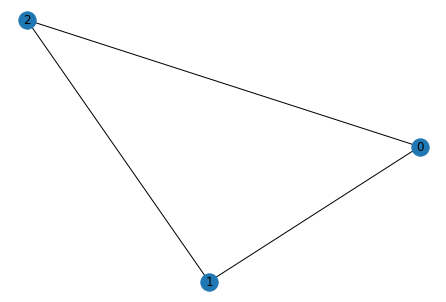

In [7]:
# Vẽ đồ thị bằng .draw(), set with_labels=True để hiện thị label từng đỉnh
nx.draw(G, with_labels = True)

## Bậc đỉnh và lân cận - Node Degree and Neighbor

In [8]:
node_id = 1

# In ra bậc của node có node_id = 1
print("Node {} has degree {}".format(node_id, G.degree[node_id]))

# In ra các lân cận của node có node_id = 1
for neighbor in G.neighbors(node_id):
  print("Node {} has neighbor {}".format(node_id, neighbor))

Node 1 has degree 2
Node 1 has neighbor 0
Node 1 has neighbor 2


## Một số chức năng khác - Other Functionalities
NetworkX cũng cung cấp nhiều phương thức hữu ích khác để nghiên cứu về đồ thị.

Dưới đây là một ví dụ lấy thông tin [PageRank](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html#networkx.algorithms.link_analysis.pagerank_alg.pagerank) của các nút (Chúng ta bàn về PageRank trong các bài Colab và bài giảng sau - Xem lectures của CS224W).

{0: 0.17857162031103999,
 1: 0.32142837968896,
 2: 0.32142837968896,
 3: 0.17857162031103999}

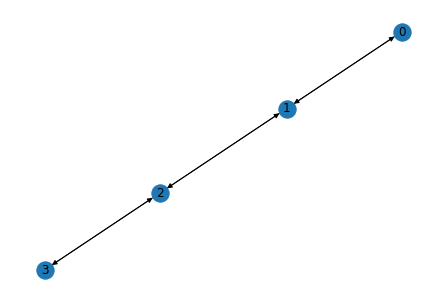

In [9]:
num_nodes = 4
# Khởi tạo một đường đi giống đồ thị và thay đổi nó thành một đồ thị hữu hướng
G = nx.DiGraph(nx.path_graph(num_nodes))

# Gọi hàm vẽ đồ thị, set with_labels=True để in ra các đỉnh đồ thị
nx.draw(G, with_labels = True)

# Lấy thông tin PageRank
pr = nx.pagerank(G, alpha=0.8)
pr

## Tài liệu - Documentation

Bạn có thể tìm hiểu nhiều hơn về các hàm trong thư viện NetworkX thông qua [tài liệu](https://networkx.org/documentation/stable/) của nó.

# PyTorch Geometric Tutorial

PyTorch Geometric (PyG) là một thư viện mở rộng cho PyTorch. Nó cũng cấp những cơ sở hữu ích dành cho việc phát triển mô hình Học Sâu Đồ thị (Graph Deep Learning models), bao gồm đa dạng các tầng neural đồ thị (graph neural network layers) và một số lượng lớn kho dữ liệu đánh giá.

Đừng lo lắng, nếu bạn chưa hiểu gì về một số kiến thức như `GCNConv`, chúng ta sẽ tìm hiểu tất cả về chúng trong các bài giảng sắp tới :) (Xem lectures của CS224W)

Tutorial (Bài hướng dẫn này) dựa vào Colab https://colab.research.google.com/drive/1h3-vJGRVloF5zStxL5I0rSy4ZUPNsjy8?usp=sharing#scrollTo=ci-LpZWhRJoI được trình bày bởi [Matthias Fey](https://rusty1s.github.io/#/)


In [10]:
import torch
print("PyTorch has version {}".format(torch.__version__))

PyTorch has version 1.8.1+cu101


## Cài đặt - Setup

The installation of PyG on Colab can be a little bit tricky. Execute the cell below -- in case of issues, more information can be found on the [PyG's installation page](https://pytorch-geometric.readthedocs.io/en/latest/notes/installation.html).

In [11]:
# Cài đặt các packages dependencies
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html

# Cài đặt PyTorch Geometric Package
!pip install -q torch-geometric

     |████████████████████████████████| 2.5MB 8.0MB/s 
     |████████████████████████████████| 1.5MB 8.9MB/s 
     |████████████████████████████████| 215kB 10.4MB/s 
     |████████████████████████████████| 235kB 24.3MB/s 
     |████████████████████████████████| 2.2MB 25.2MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 


## Trực quan hoá - Visualization

In [12]:
# Helper function cho việc trực quan hoá đồ thị
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt


# Hàm trực quan hoá cho NX Graph, PyTorch Tensor
def visualize(h, color, epoch=None, loss=None):
    '''
    Function: visualize
    Description: Helper function for visualization.
    Parameters:
      - h:
      - color:
      - epoch: Default=None
      - loss: Default=None
    Return: No return
    '''
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None:
            plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

## Giới thiệu về Graph Neural Networks - Introduction

Trong thời gian gần đây, Học Sâu trên đồ thị đã nổi lên trở thành một trong những lĩnh vực nghiên cứu nóng hổi trong cộng đồng Deep Learning. **Graph Neural Networks (GNNs)** với mục đích tổng quát hóa các khái niệm Học Sâu cổ điển thành dữ liệu có cấu trúc bất thường (trái ngược với hình ảnh hoặc văn bản) và cho phép mạng Neural suy luận về các đối tượng và mối quan hệ của chúng.

Bài hướng dẫn này sẽ giới thiệu cho các bạn một số kiến thức sơ đẳng về Học Sâu trên đồ thị thông qua Graph Neural Networks dựa trên thư viện **[PyTorch Geometric (PyG) library](https://github.com/rusty1s/pytorch_geometric)**.

PyTorch Geometric là một thư viện mở rộng cho frame Deep Learning nổi tiếng - [PyTorch](https://pytorch.org/), bao gồm nhiều phương thức đa dạng cũng như hàm hỗ trợ cho việc cài đặt Graph Neural Networks dễ dàng.

Dựa theo [Kipf et al. (2017)](https://arxiv.org/abs/1609.02907), hãy cùng đắm mình vào thế giới của GNNs bằng cách qua sát ví dụ về đồ thị có cấu trúc đơn giản, được biết đến với tên [**Zachary's karate club network**](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). Đây là một đồ thị mô tả mạng xã hội của 34 thành viên của một câu lạc bộ Karate và những liên kết giữa những thành viên mà không nằm trong câu lạc bộ. Chúng tôi rất quan tâm chúng trong việc phát hiện các nhóm (lớp) phát sinh từ tương tác của thành viên.


## Kho dữ liệu - Dataset

PyTorch Geometric cung cấp các truy cập dễ dàng đến bộ dữ liệu thông qua [`torch_geometric.datasets`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets):

In [13]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


Sau khi khởi tạo bộ dữ liệu [`KarateClub`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets.KarateClub), đầu tiên, chúng ta có thể quan sát một số thuộc tính của nó. Ví dụ như, cũng ta có thể thấy rằng bộ dữ liệu hiện có chính xác **một đồ thị**, và mỗi node trong bộ dữ liệu được gán bằng một **vector đặc trưng 34 chiều** (đơn nhất mô tả các thành viên trong câu lạc bộ Karate). Hơn nữa, đồ thị bao gồm **4 lớp**, biểu diễn nhóm (lớp) mà mỗi một node thuộc về.

Bây giờ, hãy quan sát đồ thị phía dưới một cách chi tiết hơn:

In [14]:
data = dataset[0]  # Lấy đối tượng đầu tiên của bộ dữ liệu

print(data) # In đối tượng đó ra
print('==============================================================')

# Những thông tin thống kê chi tiết về dữ liệu
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(edge_index=[2, 156], train_mask=[34], x=[34, 34], y=[34])
Number of nodes: 34
Number of edges: 156
Average node degree: 4.59
Number of training nodes: 4
Training node label rate: 0.12
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


## Dữ liệu - Data

Mỗi đồ thị trong PyTorch Geometric được biểu diễn bằng một đối tượng [`Data`](https://pytorch-geometric.readthedocs.io/en/latest/modules/data.html#torch_geometric.data.Data) object, chứa toàn bộ thông tin mô tả biểu diễn đồ thị của nó.

Chúng ta có thể in ra data object bất kỳ lúc nào thông qua `print(data)` để nhận được một mô tả tóm tắt về tất cả các thuộc tính của nó (attributes) và kích thước của những thuộc tính đó:
```
Data(edge_index=[2, 156], x=[34, 34], y=[34], train_mask=[34])
```
Chúng ta có thể nhận thấy rằng `data` object có 4 thuộc tính:
- Thuộc tính `edge_index`: chứa những thông tin về **graph connectivity** - tính liên thông, tức là một tuple của chỉ số node nguồn và chỉ node đích cho mỗi cạnh
- Thuộc tính `x` - **node features** : ví dụ như mỗi node trong 34 node sẽ được gán một vector đặc trưng 34 chiều
- Thuộc tính `y` - **node labels**: mỗi node sẽ thuộc về chính xác một lớp nào đó
- Thuộc tính `train_mask`: một thuộc tính bổ sung, mô tả những node mà chúng ta đã biết chính xác nó thuộc về lớp (nhóm) nào.

Tổng kết lại, chúng ta chỉ biết nhãn đúng của 4 node (mỗi node đại diện cho một nhóm), và nhiệm vụ của chúng ta là suy luận để gán nhãn cho tất cả những node còn lại.

The `data` object also provides some **utility functions** to infer some basic properties of the underlying graph.

`data` object cũng cung cấp một số **utility functions** để suy ra một số thuộc tính cơ bản của đồ thị phía dưới

Ví dụ như là, chúng ta có thể dễ dàng suy ra liệu có tồn tại các nút bị cô lập trong biểu đồ hay không, (tức là, không tồn tại bất kỳ nối vào một node nào đó), liệu rằng đồ thị có tồn tại chu trình hay không (tức là $(v, v) \in \mathcal{E}$) hoặc là với mỗi cạnh $(v, w) \in \mathcal{E}$ thì cũng tồn tại một cạnh  $(w, v) \in \mathcal{E}$).

In [15]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

edge_index = data.edge_index
print(edge_index.t())

<IPython.core.display.Javascript object>

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

## Chỉ mục cạnh - Edge Index

Bằng cách in ra `edge_index`, chúng ta có thể hiểu nhiều hơn cách mà PyG biểu diễn đồ thị liên thông nội. Chúng ta có thể thấy rằng với mỗi cạnh, `edge_index` là một bộ gồm 2 chỉ số node, với giá trị đầu tiên mô tả chỉ số node nguồn và giá trị thứ hai mô tả chỉ số node đích của cạnh

Cách biểu diễn này được gọi là **COO format (coordinate format)** thường dùng cho việc biểu diễn các sparse matrix - ma trận thưa. Thay vì giữ lại thông tin kề trong một biểu diễn dày đặc $\mathbf{A} \in \{ 0, 1 \}^{|\mathcal{V}| \times |\mathcal{V}|}$, PyG biểu diễn đồ thị một cách thưa thớt, có nghĩa là chỉ giữ lại các toạ độ/ giá trị cho những vị trí trong $\mathbf{A}$ là khác không.

Chúng ta có thể trực quan đồ thi bằng cách chuyển đổi nó sang định dạng thư viện `networkx` - thư viện giúp cài đặt, thực hiện một số thao tác trên đồ thị, công cụ mạnh mẽ cho việc trực quan hoá.

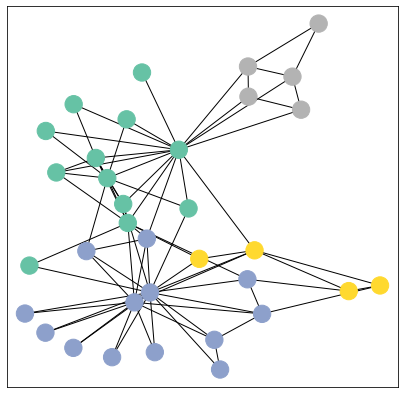

In [16]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize(G, color=data.y)

## Cài đặt Graph Neural Networks - Implementing Graph Neural Networks

Sau khi tìm hiểu về cách xử lý dữ liệu của PyG, đây là lúc cài đặt mô hình Graph Neural Network đầu tiên của chúng ta.

Với phần này, chúng ta sẽ sử dụng một trong những toán tử GNN đơn giản nhất, **GCN layer**([Kipf et al. (2017)](https://arxiv.org/abs/1609.02907)).

PyG cài đặt tầng này thông qua [`GCNConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv), có thể thực thi bằng cách truyền vào biểu diễn đặc trưng node `x` và đồ thị liên thông COO biểu diễn bởi `edge_index`.

Bằng cách này, chúng ta có thể khởi tạo Graph Neural Network đầu tiên bằng cách định nghĩ kiến trúc mạng của chúng ta như một `torch.nn.Module` class:

In [17]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.
        
        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


Ở đây, đầu tiên chúng ta khởi tạo tất cả building blocks trong phương thức `__init__` và định nghĩa tính toán của mạng trong phương thức `forward`.

Đầu tiên chúng ta định nghĩa và xếp chồng **3 tầng đồ thị tích chập (graph convolution layers)** , tương ứng với việc tổng hợp thông tin vùng lân cận 3 bước xung quanh mỗi nút (tất cả các nút cách xa tối đa 3 bước).

Hơn nữa, tầng `GCNConv` giảm chiều đặc trưng node xuống $2$, tức là $34 \rightarrow 4 \rightarrow 4 \rightarrow 2$. Mỗi tầng `GCNConv` được kích hoạt bởi một hàm [tanh](https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html?highlight=tanh#torch.nn.Tanh) non-linearity.

Sau đó, chúng ta dùng một phép biến đổi tuyến tính ([`torch.nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html?highlight=linear#torch.nn.Linear)) hoạt động như một bộ phân lớp ánh xạ những node của chúng ta ra 1 trong 4 lớp/ nhóm.

Chúng ta trả về cả đầu ra của bộ phân lớp cuối cùng cũng như node embeddings được tạo ra bởi GNN của chúng ta. Chúng ta tiến hành khởi tạo mô hình thông qua `GCN()` và in ra thông tin của mô hình

Embedding shape: [34, 2]


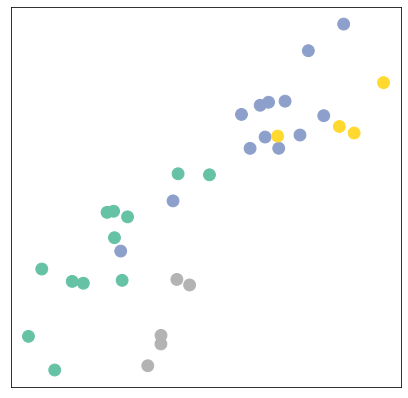

In [18]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize(h, color=data.y)

Đáng chú ý, ngay cả trước khi huấn luyện trọng số của mô hình của chúng ta, mô hình tạo ra một nhúng các nút gần giống với cấu trúc nhóm của đồ thị. Các nút cùng màu (cùng một nhóm) đã được nhóm chặt chẽ với nhau trong không gian nhúng, mặc dù trọng số của mô hình của chúng ta được khởi tạo hoàn toàn ngẫu nhiên và chúng ta chưa thực hiện bất kỳ huấn luyện nào cho thời điểm hiện tại! Điều này dẫn đến kết luận rằng GNNs đưa ra một thiên vị quy nạp mạnh, dẫn đến việc nhúng tương tự cho các nút gần nhau trong đồ thị đầu vào.

### Huấn luyện trên Karate Club Network - Training on the Karate Club Network

Nhưng chúng ta có thể làm tốt hơn nữa không? Hãy xem một ví dụ về cạch huấn luyện trọng số mạng dựa trên những tri thức về nhóm của 4 node trong đồ thị (1 node cho mỗi nhóm):

Vì mọi thức trong mô hình của chúng ta là khác biệt hoàn toàn và được tham số hoá, chúng ta có thể thêm một vài nhãn, huấn luyện mô hình và quan sát thông tin ẩn phản ứng. 

Ỏ đây, chúng ta có thể sử dụng một thủ tục học semi-supervised hoặc học quy nạp: một đơn giản chúng ta có thể huấn luyện trên một node mỗi lớp, nhưng cho phép sử dụng toàn bộ dữ liệu của đồ thị đầu vào.

Huấn luyện mô hình của chúng ta khá là tương tự với bất kỳ mô hình PyTorch nào khác.

Hơn nữa để định nghĩa kiến trúc mạng, chúng ta định nghĩa hàm mất mát ([`CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)) và khởi tạo một stochastic gradient optimizer [`Adam`](https://pytorch.org/docs/stable/optim.html?highlight=adam#torch.optim.Adam)).

After that, we perform multiple rounds of optimization, where each round consists of a forward and backward pass to compute the gradients of our model parameters w.r.t. to the loss derived from the forward pass.
If you are not new to PyTorch, this scheme should appear familar to you. 
Otherwise, the PyTorch docs provide [a good introduction on how to train a neural network in PyTorch](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#define-a-loss-function-and-optimizer).

Sau đó, chúng ta thực hiện nhiều vòng lặp tối ưu, mỗi vòng lặp bao gồm hai quá trình: lan truyền tiến - forward và lan truyền ngược - backward, tính toán đạo hàm của tham số w. Nếu bạn không phải người mới làm quen với PyTorch, sơ đồ hoạt động này sẽ có vẻ quên thuộc với các bạn

Ghi chú: 
```
loss = criterion(out[data.train_mask], data.y[data.train_mask])
```
While we compute node embeddings for all of our nodes, we **only make use of the training nodes for computing the loss**.

Trong khi chúng ta tính toán node embeddings cho tất cả các node, chúng ta chỉ có thể sử dụng các node huấn luyện cho việc tính toán mất mát.

Dưới đây là phần cài đặt bởi bộ lọc đầu ra của bộ phân lớp `out` và nhãn đúng `data.y` cho các node chứa trong `train_mask`.

Let us now start training and see how our node embeddings evolve over time (best experienced by explicitely running the code):

Bắt đầu huấn luyện mô hình và quan sát cách mà node embeddings cập nhật theo thời gian.

<IPython.core.display.Javascript object>

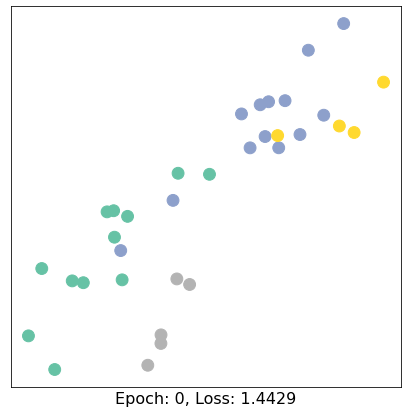

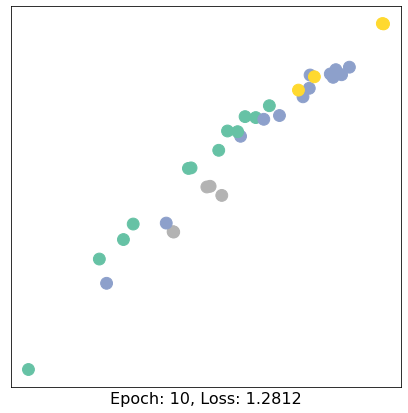

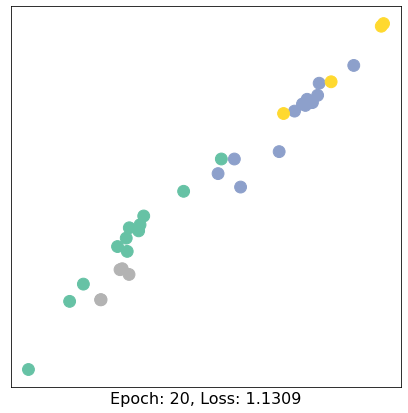

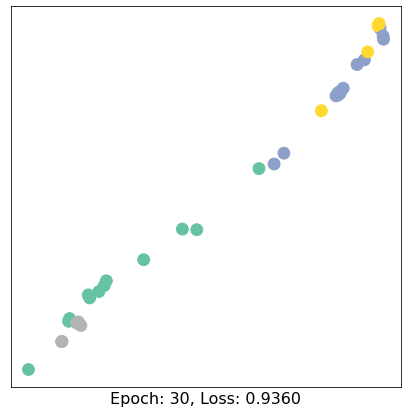

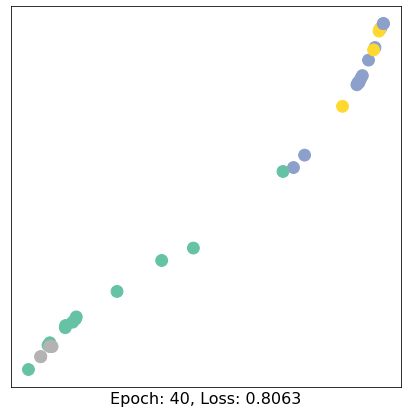

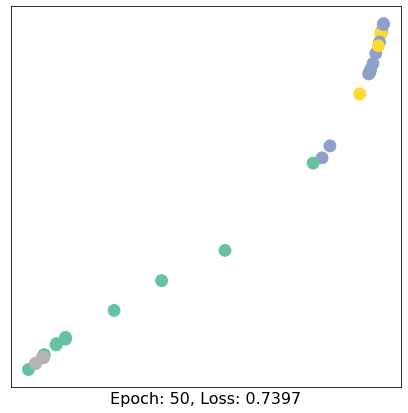

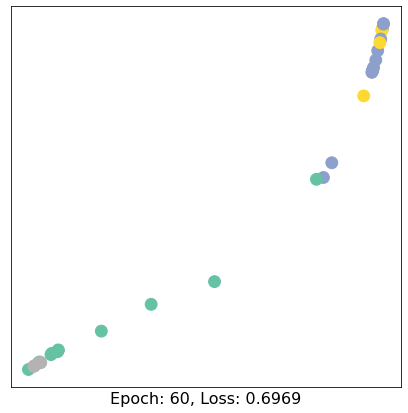

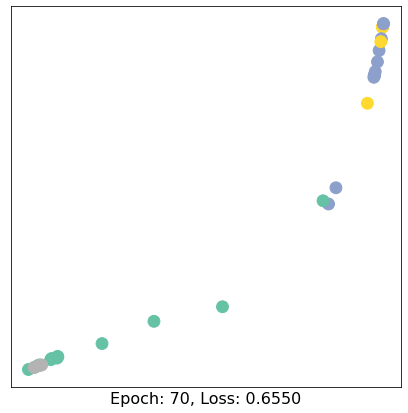

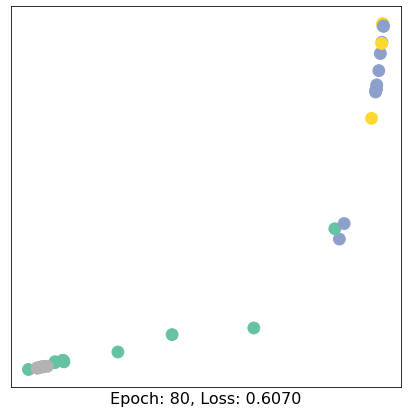

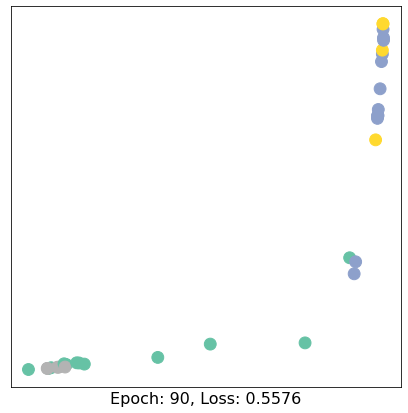

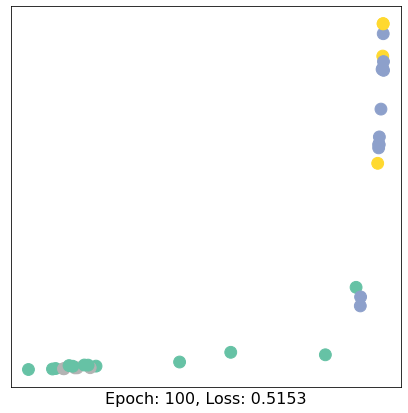

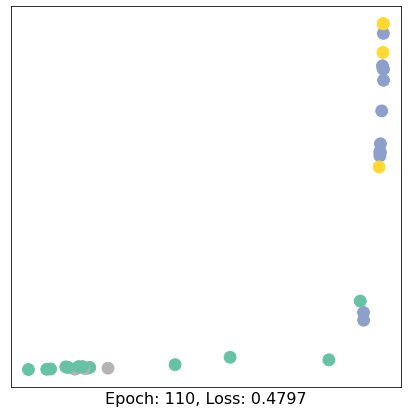

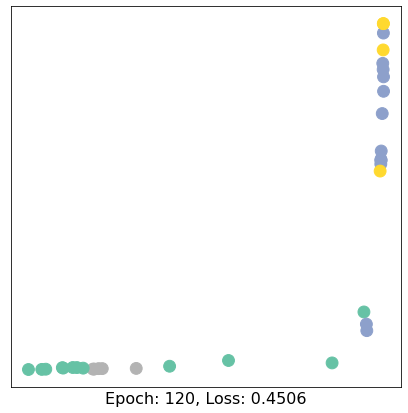

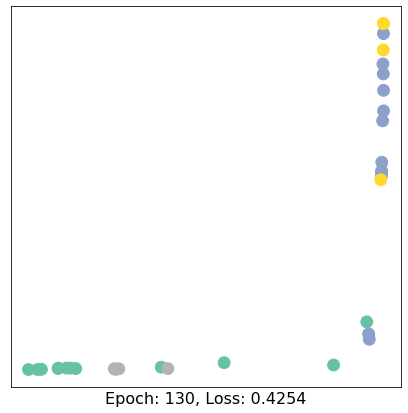

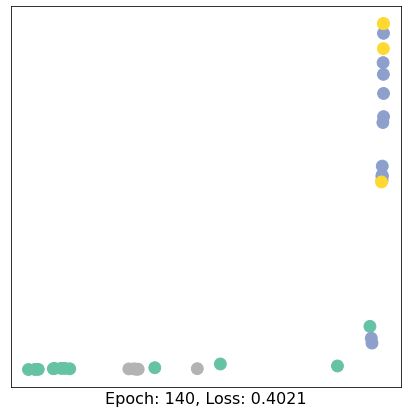

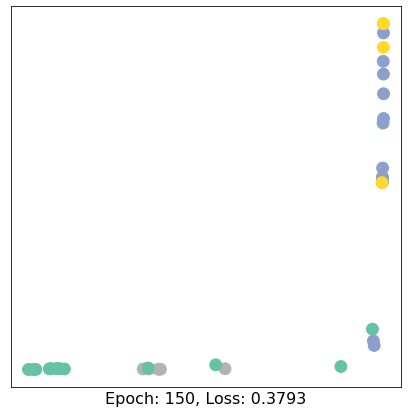

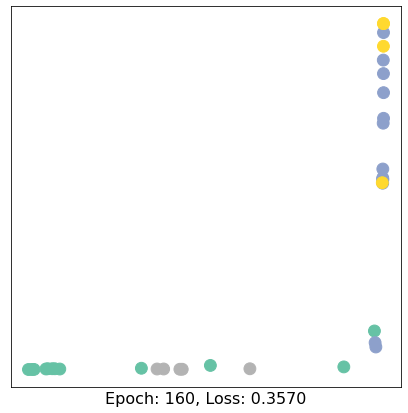

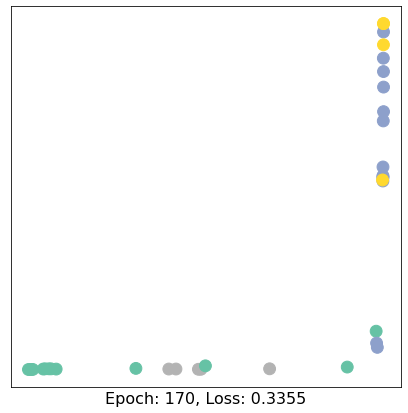

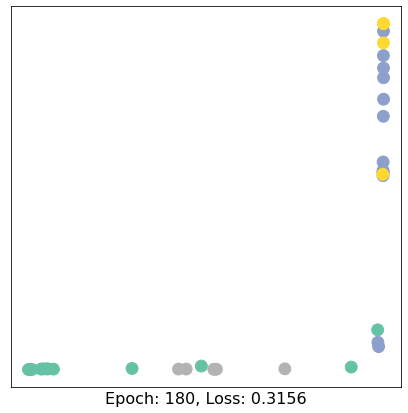

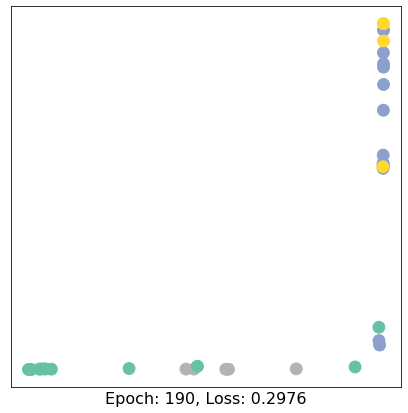

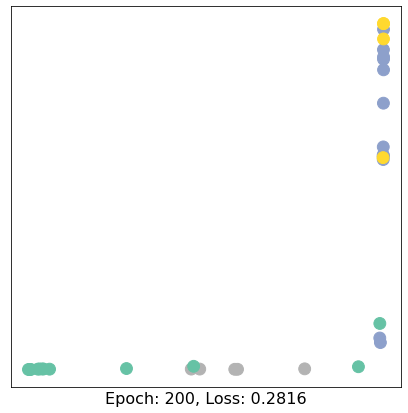

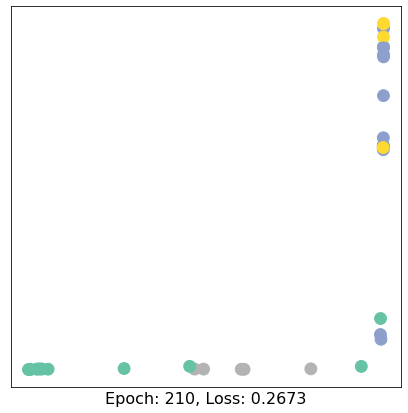

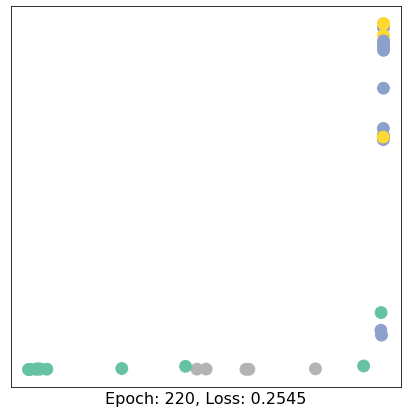

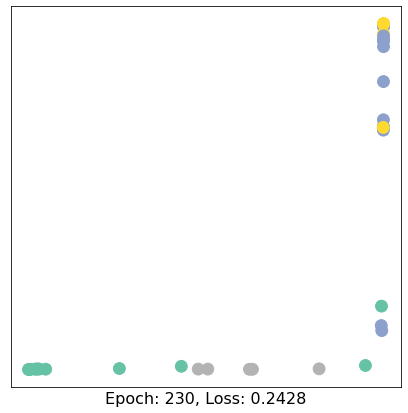

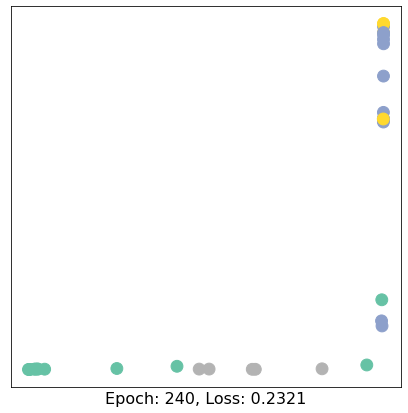

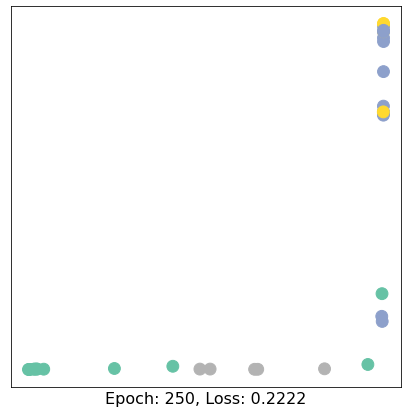

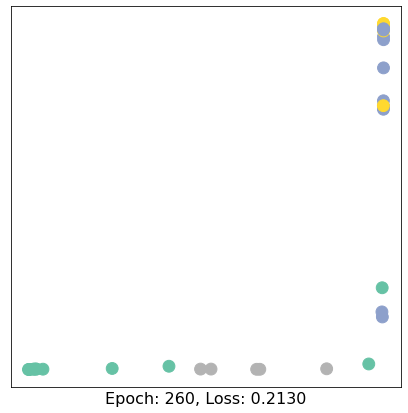

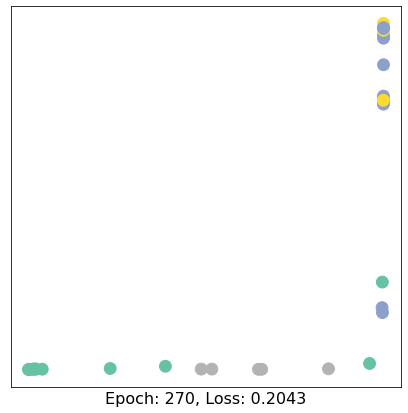

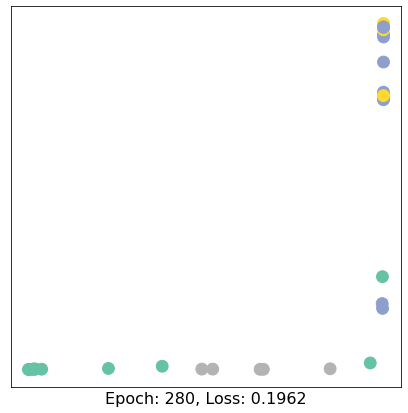

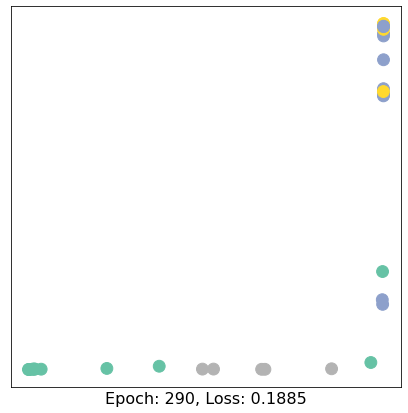

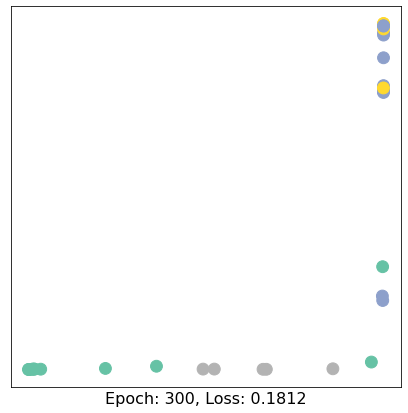

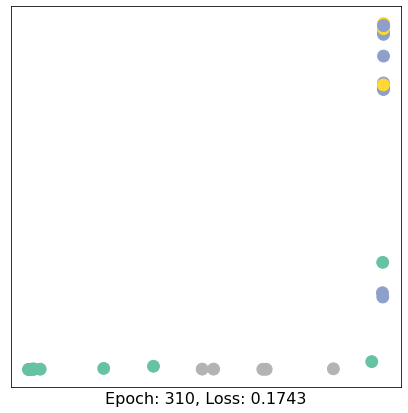

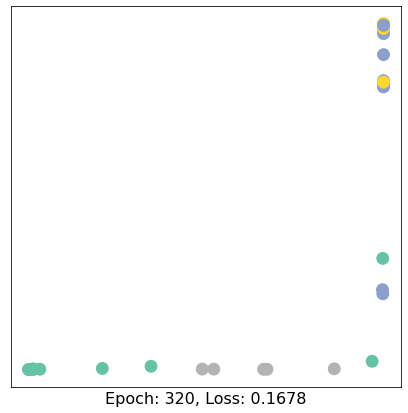

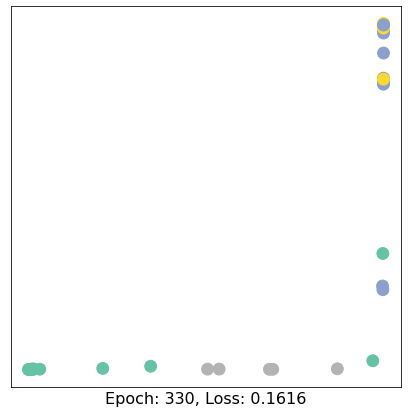

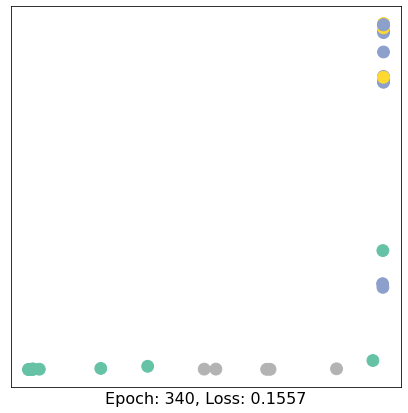

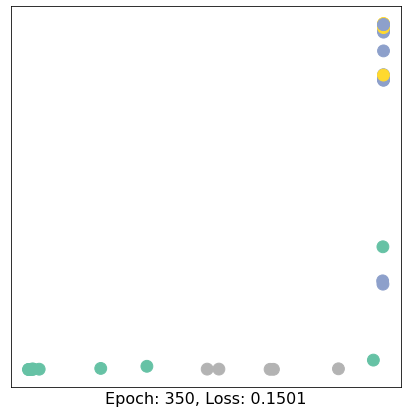

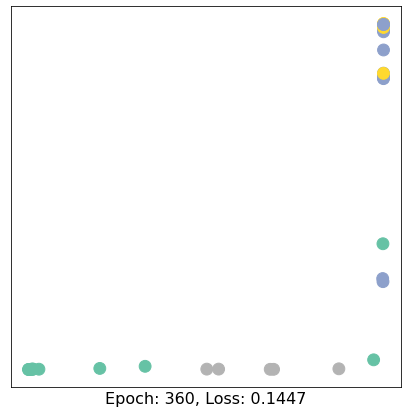

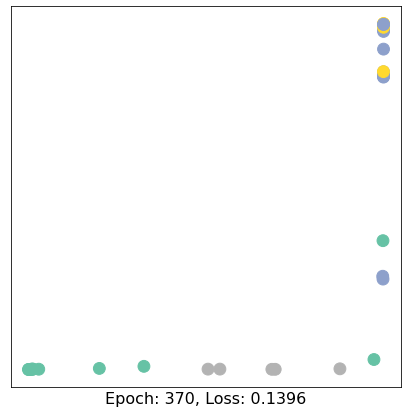

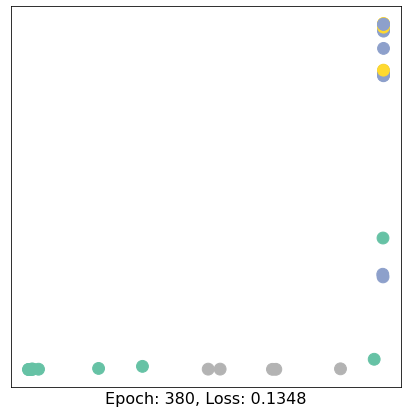

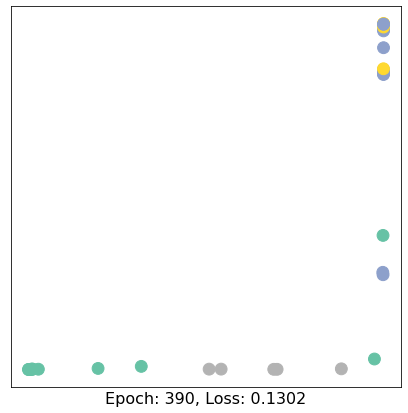

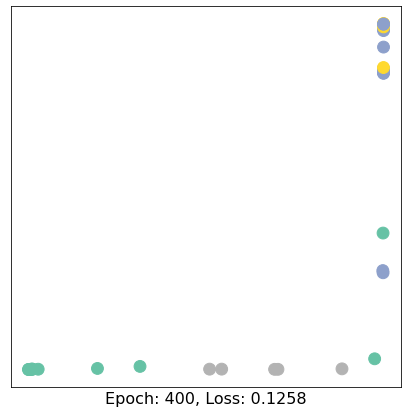

In [19]:
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    # Clear gradients.
    optimizer.zero_grad()  

    # Forward and compute loss
    ## Perform a single forward pass.
    out, h = model(data.x, data.edge_index)  
    ## Compute the loss solely based on the training nodes.
    loss = criterion(out[data.train_mask], data.y[data.train_mask]) 

    # Backward 
    loss.backward()  ## Derive gradients.
    optimizer.step()  ## Update parameters based on gradients.
    return loss, h

# Training loop
for epoch in range(401):
    loss, h = train(data)
    # Visualize the node embeddings every 10 epochs
    if epoch % 10 == 0:
        visualize(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)

Như chúng ta có thể thấy, mô hình GCN 3 lớp của chúng ta phân tách tuyến tính các nhóm và phân loại hầu hết các nút một cách chính xác.

Hơn nữa, chúng ta đã làm tất cả điều này với một vài dòng code, nhờ vào thư viện PyTorch Geometric đã giúp chúng tôi xử lý dữ liệu và cài đặt mô hình GNN.


## Tài liệu - Documentation



Bạn có thể tìm hiểu nhiều hơn về các hàm trong thư viện PyG thông qua [tài liệu](https://pytorch-geometric.readthedocs.io/en/latest/) của nó.